# Project: Analysis of Airline Delay and Cancellation Data, 2009 - 2018

A 2010 report sponsored by the Federal Aviation Administration (FAA) analyzed a variety of cost components caused by flight delays. This included the cost to airlines, cost to passengers, cost of lost demand, as well as the indirect impact of delay on the US economy. The report concluded that the total cost of all US air transportation delays in 2007 was **$32.9 billion**. Clearly, flight delays are a serious and widespread problem in the US. An exploration of multi-year (2009 - 2018) airline delay and cancellation data will be made to determine what are the causes of airline delays.

Import required libraries:

In [35]:
# import libraries here; add more as necessary.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sb

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# magic word for producing visualizations in notebook
%matplotlib inline

### Load the Data

Airline Delay and Cancellation Data datasets were collected from www.kaggle.com. This data has been combined from multiple US Government (Bureau of Transportation Statistics) datasets. This department was founded in 1966 and its mandate was to collect and disseminate transportation statistics. It provides various publicly downloadable datasets.

Note that I will not use any restricted, private, or propriety data in this analysis.

These datasets will be cleansed and combined to form a multi-year dataset in an effort to offer additional insights.

There are ten data files associated with this project:

- `2009.csv`: Airline Delay and Cancellation Data dataset for 2009.
- `2010.csv`: Airline Delay and Cancellation Data dataset for 2010.
- `2011.csv`: Airline Delay and Cancellation Data dataset for 2011.
- `2012.csv`: Airline Delay and Cancellation Data dataset for 2012.
- `2013.csv`: Airline Delay and Cancellation Data dataset for 2013.
- `2014.csv`: Airline Delay and Cancellation Data dataset for 2014.
- `2015.csv`: Airline Delay and Cancellation Data dataset for 2015.
- `2016.csv`: Airline Delay and Cancellation Data dataset for 2016.
- `2017.csv`: Airline Delay and Cancellation Data dataset for 2017.
- `2018.csv`: Airline Delay and Cancellation Data dataset for 2018.

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. You will use this information to cluster the general population into groups with similar demographic properties. Then, you will see how the people in the customers dataset fit into those created clusters. The hope here is that certain clusters are over-represented in the customers data, as compared to the general population; those over-represented clusters will be assumed to be part of the core userbase. This information can then be used for further applications, such as targeting for a marketing campaign.

To start off with, load in the demographics data for the general population into a pandas DataFrame, and do the same for the feature attributes summary. Note for all of the `.csv` data files in this project: they're semicolon (`;`) delimited, so you'll need an additional argument in your [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call to read in the data properly. Also, considering the size of the main dataset, it may take some time for it to load completely.

Load the datasets:

In [17]:
# Load in the 2009 data.
y2009 = pd.read_csv('airline-data\\2009.csv', sep = ',')

# Load in the 2010 data.
y2010 = pd.read_csv('airline-data\\2010.csv', sep = ',')

# Load in the 2011 data.
y2011 = pd.read_csv('airline-data\\2011.csv', sep = ',')

# Load in the 2012 data.
y2012 = pd.read_csv('airline-data\\2012.csv', sep = ',')

# Load in the 2013 data.
y2013 = pd.read_csv('airline-data\\2013.csv', sep = ',')

# Load in the 2014 data.
y2014 = pd.read_csv('airline-data\\2014.csv', sep = ',')

# Load in the 2015 data.
y2015 = pd.read_csv('airline-data\\2015.csv', sep = ',')

# Load in the 2016 data.
y2016 = pd.read_csv('airline-data\\2016.csv', sep = ',')

# Load in the 2017 data.
y2017 = pd.read_csv('airline-data\\2017.csv', sep = ',')

# Load in the 2018 data.
y2018 = pd.read_csv('airline-data\\2018.csv', sep = ',')

Display the number of rows and columns in the first dataset (`azdias`):

In [22]:
# Check the structure of the data after it's loaded (e.g. print the number of
# rows and columns).

print("2009 = ", y2009.shape)
print("2010 = ", y2010.shape)
print("2011 = ", y2011.shape)
print("2012 = ", y2012.shape)
print("2013 = ", y2013.shape)
print("2014 = ", y2014.shape)
print("2015 = ", y2015.shape)
print("2016 = ", y2016.shape)
print("2017 = ", y2017.shape)
print("2018 = ", y2018.shape)

2009 =  (6429338, 28)
2010 =  (6450117, 28)
2011 =  (6066650, 28)
2012 =  (6096762, 28)
2013 =  (6369482, 28)
2014 =  (5819811, 28)
2015 =  (5819079, 28)
2016 =  (5617658, 28)
2017 =  (5674621, 28)
2018 =  (7213446, 28)


Display sample data from the datasets:

In [25]:
# Display a sample of the data.

y2009.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2009-01-01,XE,1204,DCA,EWR,1100,1058.0,-2.0,18.0,1116.0,...,62.0,68.0,42.0,199.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-01-01,XE,1206,EWR,IAD,1510,1509.0,-1.0,28.0,1537.0,...,82.0,75.0,43.0,213.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-01-01,XE,1207,EWR,DCA,1100,1059.0,-1.0,20.0,1119.0,...,70.0,62.0,36.0,199.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-01-01,XE,1208,DCA,EWR,1240,1249.0,9.0,10.0,1259.0,...,77.0,56.0,37.0,199.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-01-01,XE,1209,IAD,EWR,1715,1705.0,-10.0,24.0,1729.0,...,105.0,77.0,40.0,213.0,NaN,NaN,NaN,NaN,NaN,NaN


Display the number of rows and columns from the second dataset (`feat_info`):

In [26]:
# Display a sample of the data.

y2010.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2010-01-01,MQ,4438,LGA,RDU,1940,2101.0,81.0,14.0,2115.0,...,110.0,106.0,70.0,431.0,0.0,0.0,0.0,0.0,77.0,NaN
1,2010-01-01,MQ,4440,DCA,JFK,950,949.0,-1.0,13.0,1002.0,...,70.0,60.0,38.0,213.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-01,MQ,4443,LGA,RDU,900,937.0,37.0,11.0,948.0,...,120.0,91.0,77.0,431.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-01,MQ,4445,RDU,LGA,1940,1935.0,-5.0,12.0,1947.0,...,100.0,80.0,64.0,431.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-01-01,MQ,4447,JFK,DCA,2035,2236.0,121.0,18.0,2254.0,...,85.0,66.0,47.0,213.0,0.0,0.0,0.0,0.0,102.0,NaN


In [27]:
# Display a sample of the data.

y2011.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2011-01-01,MQ,4529,BOS,JFK,1830,1823.0,-7.0,68.0,1931.0,...,90.0,146.0,48.0,187.0,0.0,0.0,49.0,0.0,0.0,NaN
1,2011-01-01,MQ,4532,BNA,DCA,1100,1052.0,-8.0,11.0,1103.0,...,95.0,88.0,74.0,562.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-01-01,MQ,4532,DCA,JFK,1400,1358.0,-2.0,9.0,1407.0,...,79.0,73.0,60.0,213.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-01-01,MQ,4537,RDU,JFK,1710,1706.0,-4.0,59.0,1805.0,...,105.0,159.0,85.0,426.0,0.0,0.0,50.0,0.0,0.0,NaN
4,2011-01-01,MQ,4540,CMH,LGA,1340,1340.0,0.0,14.0,1354.0,...,105.0,95.0,77.0,478.0,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# Display a sample of the data.

y2012.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2012-01-01,MQ,4041,BMI,ORD,1715.0,1702.0,-13.0,9.0,1711.0,...,55.0,55.0,37.0,116.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-01-01,MQ,4041,ORD,BMI,1545.0,1540.0,-5.0,11.0,1551.0,...,50.0,39.0,23.0,116.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2012-01-01,MQ,4042,SGF,ORD,715.0,705.0,-10.0,12.0,717.0,...,115.0,105.0,75.0,438.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2012-01-01,MQ,4045,ORD,DBQ,1535.0,1529.0,-6.0,13.0,1542.0,...,55.0,46.0,31.0,147.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2012-01-01,MQ,4047,ORD,RIC,1600.0,1615.0,15.0,12.0,1627.0,...,115.0,109.0,86.0,642.0,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# Display a sample of the data.

y2013.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2013-01-01,VX,108,LAX,IAD,700,700.0,0.0,8.0,708.0,...,285.0,258.0,243.0,2288.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-01,VX,114,LAX,IAD,2205,2204.0,-1.0,12.0,2216.0,...,280.0,272.0,247.0,2288.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-01-01,VX,11,JFK,SFO,730,729.0,-1.0,18.0,747.0,...,405.0,380.0,356.0,2586.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-01-01,VX,121,PHL,LAX,700,700.0,0.0,14.0,714.0,...,360.0,374.0,352.0,2402.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-01-01,VX,124,LAX,PHL,1100,1104.0,4.0,12.0,1116.0,...,315.0,273.0,252.0,2402.0,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# Display a sample of the data.

y2014.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2014-01-01,AA,2377,ICT,DFW,1135,1144.0,9.0,12.0,1156.0,...,85.0,78.0,57.0,328.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-01-01,AA,2378,MIA,TPA,2225,2220.0,-5.0,14.0,2234.0,...,60.0,55.0,37.0,204.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-01-01,EV,2500,DFW,HOU,2105,NaN,NaN,NaN,NaN,...,60.0,NaN,NaN,247.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-01-01,EV,2502,CRW,DFW,1655,1805.0,70.0,6.0,1811.0,...,185.0,180.0,150.0,946.0,0.0,0.0,0.0,0.0,65.0,NaN
4,2014-01-01,EV,2502,DFW,CRW,1320,1440.0,80.0,9.0,1449.0,...,125.0,115.0,101.0,946.0,6.0,0.0,0.0,0.0,64.0,NaN


In [31]:
# Display a sample of the data.

y2015.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2015-01-01,NK,195,MCO,FLL,2147,2143.0,-4.0,15.0,2158.0,...,63.0,62.0,40.0,177.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-01,NK,197,LGA,FLL,1050,1104.0,14.0,20.0,1124.0,...,194.0,179.0,150.0,1076.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-01,NK,198,FLL,MCO,700,712.0,12.0,19.0,731.0,...,57.0,61.0,32.0,177.0,0.0,0.0,16.0,0.0,0.0,NaN
3,2015-01-01,NK,199,IAH,LAS,2240,2251.0,11.0,8.0,2259.0,...,196.0,176.0,164.0,1222.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-01-01,NK,200,IAH,ORD,623,620.0,-3.0,15.0,635.0,...,152.0,140.0,115.0,925.0,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# Display a sample of the data.

y2016.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2016-01-01,DL,1248,DTW,LAX,1935,1935.0,0.0,23.0,1958.0,...,309.0,285.0,249.0,1979.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-01,DL,1251,ATL,GRR,2125,2130.0,5.0,13.0,2143.0,...,116.0,109.0,92.0,640.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-01,DL,1254,LAX,ATL,2255,2256.0,1.0,19.0,2315.0,...,245.0,231.0,207.0,1947.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-01,DL,1255,SLC,ATL,1656,1700.0,4.0,12.0,1712.0,...,213.0,193.0,173.0,1590.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-01,DL,1256,BZN,MSP,900,1012.0,72.0,63.0,1115.0,...,136.0,188.0,121.0,874.0,72.0,0.0,52.0,0.0,0.0,NaN


In [33]:
y2017.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2017-01-01,AA,1,JFK,LAX,800,831.0,31.0,25.0,856.0,...,402.0,398.0,347.0,2475.0,27.0,0.0,0.0,0.0,0.0,NaN
1,2017-01-01,AA,2,LAX,JFK,900,934.0,34.0,34.0,1008.0,...,327.0,335.0,289.0,2475.0,34.0,0.0,8.0,0.0,0.0,NaN
2,2017-01-01,AA,4,LAX,JFK,1130,1221.0,51.0,20.0,1241.0,...,328.0,319.0,284.0,2475.0,7.0,0.0,0.0,0.0,35.0,NaN
3,2017-01-01,AA,5,DFW,HNL,1135,1252.0,77.0,19.0,1311.0,...,517.0,537.0,513.0,3784.0,77.0,0.0,20.0,0.0,0.0,NaN
4,2017-01-01,AA,6,OGG,DFW,1855,1855.0,0.0,16.0,1911.0,...,425.0,467.0,440.0,3711.0,0.0,0.0,42.0,0.0,0.0,NaN


In [34]:
# Display a sample of the data.

y2018.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2018-01-01,UA,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,...,268.0,250.0,225.0,1605.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,UA,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,...,99.0,83.0,65.0,414.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,UA,2426,SNA,DEN,1335,1330.0,-5.0,15.0,1345.0,...,134.0,126.0,106.0,846.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,UA,2425,RSW,ORD,1546,1552.0,6.0,19.0,1611.0,...,190.0,182.0,157.0,1120.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,UA,2424,ORD,ALB,630,650.0,20.0,13.0,703.0,...,112.0,106.0,83.0,723.0,NaN,NaN,NaN,NaN,NaN,NaN


## Step 1: Preprocessing

### Step 1.1: Assess Missing Data

The feature summary file contains a summary of properties for each demographics data column. You will use this file to help you make cleaning decisions during this stage of the project. First of all, you should assess the demographics data in terms of missing data. Pay attention to the following points as you perform your analysis, and take notes on what you observe. Make sure that you fill in the **Discussion** cell with your findings and decisions at the end of each step that has one!

#### Step 1.1.1: Convert Missing Value Codes to NaNs
The fourth column of the feature attributes summary (loaded in above as `feat_info`) documents the codes from the data dictionary that indicate missing or unknown data. While the file encodes this as a list (e.g. `[-1,0]`), this will get read in as a string object. You'll need to do a little bit of parsing to make use of it to identify and clean the data. Convert data that matches a 'missing' or 'unknown' value code into a numpy NaN value. You might want to see how much data takes on a 'missing' or 'unknown' code, and how much data is naturally missing, as a point of interest.

**As one more reminder, you are encouraged to add additional cells to break up your analysis into manageable chunks.**

Define function to calculate the number of NaN data values in a dataset:

In [8]:
# Define function to calculate the number of NaNs.
def count_nan(df):
    return(df.isnull().sum().sum())

Display the number of missing or unknown data values:

In [9]:
# Display the number of missing data.
print(count_nan(azdias))

4896838


Convert the missing or unknown data to NaNs and remove from the dataset:

In [10]:
# Convert the missing data to NaNs and remove them from the datatset.
for column in range(azdias.shape[1]):
    name_of_column = azdias.columns[column]
    nan_list = feat_info.iloc[column, 3]
    nan_list = nan_list.replace('[', '')
    nan_list = nan_list.replace(']', '')
    nan_list = nan_list.split(',')
    if nan_list != ['']:
        for nan_code in nan_list:
            if azdias[name_of_column].dtype == 'object':
                azdias.loc[azdias[name_of_column] == nan_code, name_of_column] = np.nan
            else:
                nan_code = int(nan_code)
                azdias.loc[azdias[name_of_column] == nan_code, name_of_column] = np.nan

Display the number of missing or unknown data after the conversion:

In [11]:
# Display number of missing data after conversion.
print(count_nan(azdias))

8373929


#### Step 1.1.2: Assess Missing Data in Each Column

How much missing data is present in each column? There are a few columns that are outliers in terms of the proportion of values that are missing. You will want to use matplotlib's [`hist()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) function to visualize the distribution of missing value counts to find these columns. Identify and document these columns. While some of these columns might have justifications for keeping or re-encoding the data, for this project you should just remove them from the dataframe. (Feel free to make remarks about these outlier columns in the discussion, however!)

For the remaining features, are there any patterns in which columns have, or share, missing data?

Display the name of each column in the dataset, along with the count of missing data in that column:

In [12]:
# Perform an assessment of how much missing data there is in each column of the dataset.

# Display all rows.
pd.options.display.max_rows = None

# Build the missing data.
missing_column_data = pd.DataFrame(azdias.shape[0] - azdias.count())
missing_column_data.columns = ['missing_data']

# Display each column in the dataset, along with count of missing data in that column.
print(missing_column_data)

                       missing_data
AGER_TYP                     685843
ALTERSKATEGORIE_GROB           2881
ANREDE_KZ                         0
CJT_GESAMTTYP                  4854
FINANZ_MINIMALIST                 0
FINANZ_SPARER                     0
FINANZ_VORSORGER                  0
FINANZ_ANLEGER                    0
FINANZ_UNAUFFAELLIGER             0
FINANZ_HAUSBAUER                  0
FINANZTYP                         0
GEBURTSJAHR                  392318
GFK_URLAUBERTYP                4854
GREEN_AVANTGARDE                  0
HEALTH_TYP                   111196
LP_LEBENSPHASE_FEIN           97632
LP_LEBENSPHASE_GROB           94572
LP_FAMILIE_FEIN               77792
LP_FAMILIE_GROB               77792
LP_STATUS_FEIN                 4854
LP_STATUS_GROB                 4854
NATIONALITAET_KZ             108315
PRAEGENDE_JUGENDJAHRE        108164
RETOURTYP_BK_S                 4854
SEMIO_SOZ                         0
SEMIO_FAM                         0
SEMIO_REL                   

Display a chart to make it easier to understand the missing data:

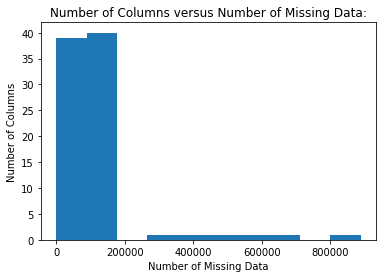

In [13]:
# Draw a histogram that shows the number of columns versus the number of missing data.
plot.hist(missing_column_data['missing_data'])
plot.ylabel('Number of Columns')
plot.xlabel('Number of Missing Data')
plot.title('Number of Columns versus Number of Missing Data:')

# Display the chart.
plot.show()

As can be seen in the histogram above, the outliers start just before 200,000 missing data, outliers will defined as those with greater or equal to 200,000 missing data.

Generate the outlier columns and display them:

In [14]:
# Show the outlier columns (missing data >= 200,000).
missing_column_data_outliers = missing_column_data[missing_column_data['missing_data'] >= 200000]

# Display the missing column outliers.
print(missing_column_data_outliers)

              missing_data
AGER_TYP            685843
GEBURTSJAHR         392318
TITEL_KZ            889061
ALTER_HH            310267
KK_KUNDENTYP        584612
KBA05_BAUMAX        476524


Remove the outlier columns from the `azdias` and `feat_info` datasets and display the number of rows and columns for each dataset:

In [15]:
# Remove the outliers from the datasets. (You'll perform other data
# engineering tasks such as re-encoding and imputation later.)

# Determine the outlier columns.
outlier_columns = missing_column_data_outliers.index.tolist()

# Determine the outlier rows.
outlier_rows = feat_info.loc[feat_info['attribute'].isin(outlier_columns)].index.tolist()

# Drop outlier columns from azdias dataset.
azdias = azdias.drop(columns = outlier_columns)

# Drop outlier rows from feat_info dataset.
feat_info = feat_info.drop(outlier_rows)

# Display the rows x columns after the outliers are removed for each dataset.
print('azdias dataset:', azdias.shape)
print('feat_info dataset:', feat_info.shape)

azdias dataset: (891221, 79)
feat_info dataset: (79, 4)


As can be seen, 6 columns have been removed.

#### Discussion 1.1.2: Assess Missing Data in Each Column

The majority of columns have less than 200,000 missing values.  From visual inspection of the chart, columns with more than or equal to 200,000 missing data are considered outliers, and have been removed:

- `AGER_TYP`
- `GEBURTSJAHR`
- `TITEL_KZ`
- `ALTER_HH`
- `KK_KUNDENTYP`
- `KBA05_BAUMAX`

A visual inspection reveals that there are several sets of columns with the same count of missing data:

- `LP_FAMILIE_FEIN` and `LP_FAMILIE_GROB`.
- `LP_STATUS_FEIN` and `LP_STATUS_GROB`.
- `CAMEO_DEUG_2015`, `CAMEO_DEU_2015` and `CAMEO_INTL_2015`. 
- `KBA05_ANTG1`,  `KBA05_ANTG2`, `KBA05_ANTG3`, `KBA05_ANTG4`, and `KBA05_GBZ`.
- `PLZ8_ANTG1`, `PLZ8_ANTG2`, `PLZ8_ANTG3`, `PLZ8_ANTG4`, `PLZ8_BAUMAX`, `PLZ8_HHZ`, and `PLZ8_GBZ`.
- `ARBEIT` and `RELAT_AB`.

#### Step 1.1.3: Assess Missing Data in Each Row

Now, you'll perform a similar assessment for the rows of the dataset. How much data is missing in each row? As with the columns, you should see some groups of points that have a very different numbers of missing values. Divide the data into two subsets: one for data points that are above some threshold for missing values, and a second subset for points below that threshold.

In order to know what to do with the outlier rows, we should see if the distribution of data values on columns that are not missing data (or are missing very little data) are similar or different between the two groups. Select at least five of these columns and compare the distribution of values.
- You can use seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) function to create a bar chart of code frequencies and matplotlib's [`subplot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) function to put bar charts for the two subplots side by side.
- To reduce repeated code, you might want to write a function that can perform this comparison, taking as one of its arguments a column to be compared.

Depending on what you observe in your comparison, this will have implications on how you approach your conclusions later in the analysis. If the distributions of non-missing features look similar between the data with many missing values and the data with few or no missing values, then we could argue that simply dropping those points from the analysis won't present a major issue. On the other hand, if the data with many missing values looks very different from the data with few or no missing values, then we should make a note on those data as special. We'll revisit these data later on. **Either way, you should continue your analysis for now using just the subset of the data with few or no missing values.**

Calculate the count of missing values for each row of the dataset:

In [16]:
# Calculate the amount of missing data for each row of the dataset.
missing_row_data = pd.DataFrame(azdias.shape[1] - azdias.count(axis = 1))
missing_row_data.columns = ['missing_data']

# Display a sample of the missing row data.
missing_row_data.head(10)

,missing_data
0,43
1,0
2,0
3,7
4,0
5,0
6,0
7,0
8,0
9,0


A histogram will be displayed to show the number of rows versus the number of missing data.

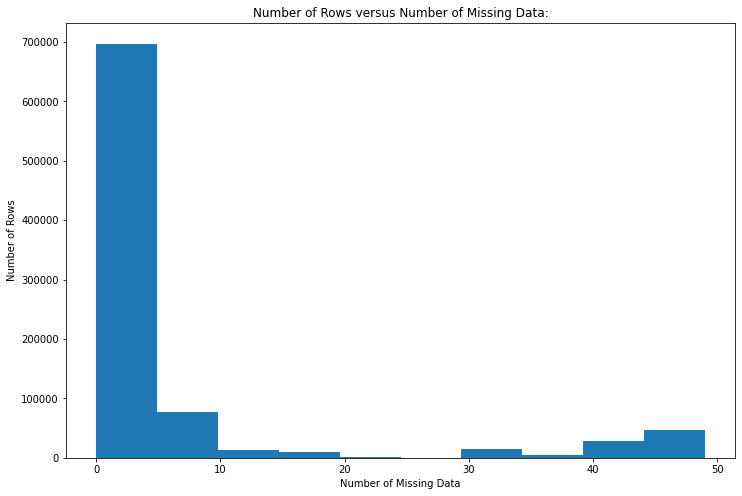

In [17]:
# Draw a histogram that shows the number of rows versus the number of missing values.
plot.figure(figsize = (12, 8))
plot.hist(missing_row_data['missing_data'])
plot.ylabel('Number of Rows')
plot.xlabel('Number of Missing Data')
plot.title('Number of Rows versus Number of Missing Data:')

# Display the chart.
plot.show()

The histogram has been enlarged to make sure that we can see all the plotted data.  As can be seen, the number of missing data finishes just before half-way to 30. Outliers look to be just before 30 and end just before 50, so 25 looks to be just after the non-outlier data, and before the outlier data starts.

The data will be divided into two subsets: less than 25 missing data and more than (or equal to) 25 missing data.

In [18]:
# Write code to divide the data into two subsets based on the number of missing values in each row.
missing_data_lt_25 = azdias[azdias.isnull().sum(axis = 1) < 25].reset_index(drop = True)
missing_data_gt_or_eq_25 = azdias[azdias.isnull().sum(axis = 1) >= 25].reset_index(drop = True)

Look at the distribution values for at least 5 columns where there are no or few missing data: 

In [19]:
# Compare the distribution of values for at least five columns where there are no or few missing values,
# between the two subsets.
no_missing_column_data = missing_column_data[missing_column_data['missing_data'] == 0].index.tolist()

Display the columns that have no missing data:

In [20]:
# Display the columns that have no missing data.
print(no_missing_column_data)

['ANREDE_KZ', 'FINANZ_MINIMALIST', 'FINANZ_SPARER', 'FINANZ_VORSORGER', 'FINANZ_ANLEGER', 'FINANZ_UNAUFFAELLIGER', 'FINANZ_HAUSBAUER', 'FINANZTYP', 'GREEN_AVANTGARDE', 'SEMIO_SOZ', 'SEMIO_FAM', 'SEMIO_REL', 'SEMIO_MAT', 'SEMIO_VERT', 'SEMIO_LUST', 'SEMIO_ERL', 'SEMIO_KULT', 'SEMIO_RAT', 'SEMIO_KRIT', 'SEMIO_DOM', 'SEMIO_KAEM', 'SEMIO_PFLICHT', 'SEMIO_TRADV', 'ZABEOTYP']


Choose the first 5 columns where there are no missing data and show them:

In [21]:
# Display first 5 columns with few or zero missing values.
first_5_no_missing_data_columns = no_missing_column_data[:5]

# Display the columns where there are no missing data.
print(first_5_no_missing_data_columns)

['ANREDE_KZ', 'FINANZ_MINIMALIST', 'FINANZ_SPARER', 'FINANZ_VORSORGER', 'FINANZ_ANLEGER']


Show charts to compare columns with many missing data versus those with no or few missing data:

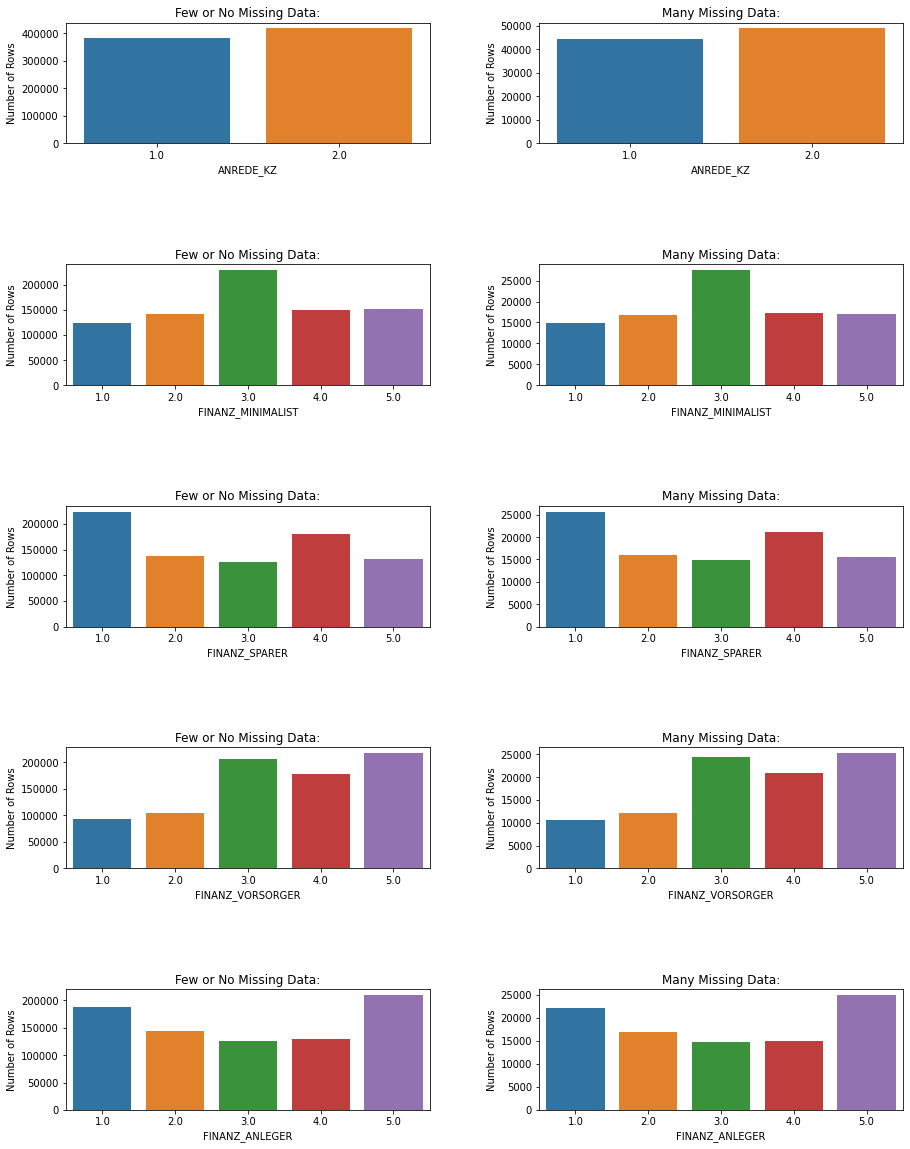

In [22]:
# Define function to display a countplot.
def draw_countplot(data, axes, title, chart_number):
    cp = sb.countplot(x = data, ax = axes[column][chart_number])
    cp.axes.yaxis.label.set_text('Number of Rows')
    axes[column][chart_number].set_title(title)
    
# Generate charts comparing columns with missing data versus those with few or no missing data.
few_or_no_missing_data = azdias.iloc[missing_data_lt_25.index, :]
many_missing_data = azdias.iloc[missing_data_gt_or_eq_25.index, :]

# Setup the charts.
figure, axes = plot.subplots(nrows = len(first_5_no_missing_data_columns), ncols = 2, figsize = (15, 20))
figure.subplots_adjust(hspace = 1, wspace = 0.3)

# Create the individual countplots.
for column in range(len(first_5_no_missing_data_columns)):
    current_column = first_5_no_missing_data_columns[column]
    draw_countplot(few_or_no_missing_data[current_column], axes, 'Few or No Missing Data:', 0)
    draw_countplot(many_missing_data[current_column], axes, 'Many Missing Data:', 1)

# Display the charts.
plot.show()

#### Discussion 1.1.3: Assess Missing Data in Each Row

It can be seen from the charts above, that the distribution of data between the *Few or No Missing Data* and *Many Missing Data* look the same, although the scale is different.  My conclusion is that dropping the *Many Missing Data* data will not affect the analysis.

### Step 1.2: Select and Re-Encode Features

Checking for missing data isn't the only way in which you can prepare a dataset for analysis. Since the unsupervised learning techniques to be used will only work on data that is encoded numerically, you need to make a few encoding changes or additional assumptions to be able to make progress. In addition, while almost all of the values in the dataset are encoded using numbers, not all of them represent numeric values. Check the third column of the feature summary (`feat_info`) for a summary of types of measurement.
- For numeric and interval data, these features can be kept without changes.
- Most of the variables in the dataset are ordinal in nature. While ordinal values may technically be non-linear in spacing, make the simplifying assumption that the ordinal variables can be treated as being interval in nature (that is, kept without any changes).
- Special handling may be necessary for the remaining two variable types: categorical, and 'mixed'.

In the first two parts of this sub-step, you will perform an investigation of the categorical and mixed-type features and make a decision on each of them, whether you will keep, drop, or re-encode each. Then, in the last part, you will create a new data frame with only the selected and engineered columns.

Data wrangling is often the trickiest part of the data analysis process, and there's a lot of it to be done here. But stick with it: once you're done with this step, you'll be ready to get to the machine learning parts of the project!

Create a new dataset that contains the `few_or_no_missing_data` dataset:

In [23]:
# Create a new dataset.
azdias_clean = few_or_no_missing_data

Display a list of features and how many there are for each data type:

In [24]:
# How many features are there of each data type?
all_features = feat_info.groupby(['type']).count()

# Display the features of each data type.
print(all_features)

             attribute  information_level  missing_or_unknown
type                                                         
categorical         18                 18                  18
mixed                6                  6                   6
numeric              6                  6                   6
ordinal             49                 49                  49


#### Step 1.2.1: Re-Encode Categorical Features

For categorical data, you would ordinarily need to encode the levels as dummy variables. Depending on the number of categories, perform one of the following:
- For binary (two-level) categoricals that take numeric values, you can keep them without needing to do anything.
- There is one binary variable that takes on non-numeric values. For this one, you need to re-encode the values as numbers or create a dummy variable.
- For multi-level categoricals (three or more values), you can choose to encode the values using multiple dummy variables (e.g. via [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)), or (to keep things straightforward) just drop them from the analysis. As always, document your choices in the Discussion section.

Determine the categorical features and show them:

In [25]:
# Assess categorical variables: which are binary, which are multi-level, and
# which one needs to be re-encoded?

# Determine categorical features.
categorical_features = feat_info[feat_info['type'] == 'categorical']['attribute'].values

# Display categorical features.
print(categorical_features)

['ANREDE_KZ' 'CJT_GESAMTTYP' 'FINANZTYP' 'GFK_URLAUBERTYP'
 'GREEN_AVANTGARDE' 'LP_FAMILIE_FEIN' 'LP_FAMILIE_GROB' 'LP_STATUS_FEIN'
 'LP_STATUS_GROB' 'NATIONALITAET_KZ' 'SHOPPER_TYP' 'SOHO_KZ' 'VERS_TYP'
 'ZABEOTYP' 'GEBAEUDETYP' 'OST_WEST_KZ' 'CAMEO_DEUG_2015' 'CAMEO_DEU_2015']


Remove remaining outlier columns that were determined earlier, then display the remaining columns:

In [26]:
# Remove remaining outlier columns that were determined earlier.
categorical_features = [feature for feature in categorical_features if feature in azdias_clean.columns]

# Display categorical features.
print(categorical_features)

['ANREDE_KZ', 'CJT_GESAMTTYP', 'FINANZTYP', 'GFK_URLAUBERTYP', 'GREEN_AVANTGARDE', 'LP_FAMILIE_FEIN', 'LP_FAMILIE_GROB', 'LP_STATUS_FEIN', 'LP_STATUS_GROB', 'NATIONALITAET_KZ', 'SHOPPER_TYP', 'SOHO_KZ', 'VERS_TYP', 'ZABEOTYP', 'GEBAEUDETYP', 'OST_WEST_KZ', 'CAMEO_DEUG_2015', 'CAMEO_DEU_2015']


Determine the binary features and display them:

In [27]:
# Determine the binary features.
binary_features = [feature for feature in categorical_features if azdias_clean[feature].nunique() == 2]

# Display the binary features.
print(binary_features)

['ANREDE_KZ', 'GREEN_AVANTGARDE', 'SOHO_KZ', 'VERS_TYP', 'OST_WEST_KZ']


Determine the multi-level features and display them:

In [28]:
# Determine the multi-level features.
multi_level_features = [feature for feature in categorical_features if azdias_clean[feature].nunique() > 2]

# Display the multi-level features.
print(multi_level_features)

['CJT_GESAMTTYP', 'FINANZTYP', 'GFK_URLAUBERTYP', 'LP_FAMILIE_FEIN', 'LP_FAMILIE_GROB', 'LP_STATUS_FEIN', 'LP_STATUS_GROB', 'NATIONALITAET_KZ', 'SHOPPER_TYP', 'ZABEOTYP', 'GEBAEUDETYP', 'CAMEO_DEUG_2015', 'CAMEO_DEU_2015']


Decide which binary feature is required to be re-encoded by displaying the unique values of each binary feature:

In [29]:
# Find the feature this is required to be re-encoded by displaying the unique values of each binary feature.
for feature in binary_features:
    print(feature, azdias_clean[feature].unique())

ANREDE_KZ [1. 2.]
GREEN_AVANTGARDE [0 1]
SOHO_KZ [nan  1.  0.]
VERS_TYP [nan  2.  1.]
OST_WEST_KZ [nan 'W' 'O']


As can be seen above the `OST_WEST_KZ` values require re-encoding since they are not numbers.

Re-encode to keep this feature in the analysis:

In [30]:
# Re-encode to keep in the analysis.
new_data = {'W': 0, 'O': 1}
azdias_clean = azdias_clean.replace({'OST_WEST_KZ': new_data})

Display the multi-level features that are removed:

In [31]:
# Remove multi-level features.
for feature in multi_level_features:
    print(feature)
    azdias_clean = azdias_clean.drop(feature, axis = 1)

CJT_GESAMTTYP
FINANZTYP
GFK_URLAUBERTYP
LP_FAMILIE_FEIN
LP_FAMILIE_GROB
LP_STATUS_FEIN
LP_STATUS_GROB
NATIONALITAET_KZ
SHOPPER_TYP
ZABEOTYP
GEBAEUDETYP
CAMEO_DEUG_2015
CAMEO_DEU_2015


Display some sample data:

In [32]:
# Display sample data.
azdias_clean.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,2.0,1.0,3.0,4.0,3.0,5.0,5.0,3.0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,2.0,1.0,5.0,2.0,5.0,4.0,5.0,0,3.0,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,3.0,2.0,1.0,4.0,1.0,2.0,3.0,5.0,1,3.0,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,4.0,2.0,4.0,2.0,5.0,2.0,1.0,2.0,0,2.0,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,3.0,1.0,4.0,3.0,4.0,1.0,3.0,2.0,0,3.0,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0


#### Discussion 1.2.1: Re-Encode Categorical Features

I re-encoded the values in `OST_WEST_KZ` as numbers to keep it in the analysis.  I calculated, and kept the binary features `ANREDE_KZ`, `GREEN_AVANTGARDE`, `SOHO_KZ`, `VERS_TYP`, and `OST_WEST_KZ`.  The multi-level features were calculated and then removed.

#### Step 1.2.2: Engineer Mixed-Type Features

There are a handful of features that are marked as "mixed" in the feature summary that require special treatment in order to be included in the analysis. There are two in particular that deserve attention; the handling of the rest are up to your own choices:
- "PRAEGENDE_JUGENDJAHRE" combines information on three dimensions: generation by decade, movement (mainstream vs. avantgarde), and nation (east vs. west). While there aren't enough levels to disentangle east from west, you should create two new variables to capture the other two dimensions: an interval-type variable for decade, and a binary variable for movement.
- "CAMEO_INTL_2015" combines information on two axes: wealth and life stage. Break up the two-digit codes by their 'tens'-place and 'ones'-place digits into two new ordinal variables (which, for the purposes of this project, is equivalent to just treating them as their raw numeric values).
- If you decide to keep or engineer new features around the other mixed-type features, make sure you note your steps in the Discussion section.

Be sure to check `Data_Dictionary.md` for the details needed to finish these tasks.

Investigate `PRAEGENDE_JUGENDJAHRE` and create two new columns:

In [33]:
# Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new columns.
azdias_clean['DECADE'] = azdias_clean['PRAEGENDE_JUGENDJAHRE']
azdias_clean['MOVEMENT'] = azdias_clean['PRAEGENDE_JUGENDJAHRE']

In [34]:
# Create dictionaries to map initial feature values to new feature values.
decade_dictionary = {1:1, 2:1, 3:2, 4:2, 5:3, 6:3, 7:3, 8:4, 9:4, 10:5, 11:5, 12:5, 13:5, 14:6, 15:6}
movement_dictionary = {1:1, 2:0, 3:1, 4:0, 5:1, 6:0, 7:0, 8:1, 9:0, 10:1, 11:0, 12:1, 13:0, 14:1, 15:0}

In [35]:
# Replace using the dictionaries.
azdias_clean['DECADE'].replace(decade_dictionary, inplace = True)
azdias_clean['MOVEMENT'].replace(movement_dictionary, inplace = True)

Display the rows x columns to show that 2 new columns have been added:

In [36]:
# Display the rows x columns of the dataset.
azdias_clean.shape

(797906, 68)

Investigate `CAMEO_INTL_2015` and create two new columns:

In [37]:
# Investigate "CAMEO_INTL_2015" and engineer two new columns.
azdias_clean['WEALTH'] = azdias_clean['CAMEO_INTL_2015']
azdias_clean['LIFE_STAGE'] = azdias_clean['CAMEO_INTL_2015']

In [38]:
# Create dictionaries to map initial feature values to new feature values.
wealth_dictionary = {'11':1, '12':1, '13':1, '14':1, '15':1, '21':2, '22':2, '23':2, '24':2, '25':2,
               '31':3, '32':3, '33':3, '34':3, '35':3, '41':4, '42':4, '43':4, '44':4, '45':4,
               '51':5, '52':5, '53':5, '54':5, '55':5}

life_stage_dictionary = {'11':1, '12':2, '13':3, '14':4, '15':5, '21':1, '22':2, '23':3, '24':4, '25':5,
                   '31':1, '32':2, '33':3, '34':4, '35':5, '41':1, '42':2, '43':3, '44':4, '45':5,
                   '51':1, '52':2, '53':3, '54':4, '55':5}

In [39]:
# Replace using the dictionaries.
azdias_clean['WEALTH'].replace(wealth_dictionary, inplace = True)
azdias_clean['LIFE_STAGE'].replace(life_stage_dictionary, inplace = True)

Display the rows x columns to show that 2 new columns have been added:

In [40]:
# Display the rows x columns of the dataset.
azdias_clean.shape

(797906, 70)

#### Discussion 1.2.2: Engineer Mixed-Type Features

The two mixed-value features `PRAEGENDE_JUGENDJAHRE` and `CAMEO_INTL_2015` were kept.  For each of these mixed-value features I created two new feature columns, copied values from the initial mixed-value feature column, created two dictionaries to map initial feature values to new feature values, and performed a replace operation using the dictionaries on the new feature columns. The remaining mixed-values features will be removed.

#### Step 1.2.3: Complete Feature Selection

In order to finish this step up, you need to make sure that your data frame now only has the columns that you want to keep. To summarize, the dataframe should consist of the following:
- All numeric, interval, and ordinal type columns from the original dataset.
- Binary categorical features (all numerically-encoded).
- Engineered features from other multi-level categorical features and mixed features.

Make sure that for any new columns that you have engineered, that you've excluded the original columns from the final dataset. Otherwise, their values will interfere with the analysis later on the project. For example, you should not keep "PRAEGENDE_JUGENDJAHRE", since its values won't be useful for the algorithm: only the values derived from it in the engineered features you created should be retained. As a reminder, your data should only be from **the subset with few or no missing values**.

Remove the original engineered columns (rows in the case of the `feat_info` dataset) from both datasets and display a row x column count before and after:

In [41]:
# Display the rows x columns of both datasets.
print('azdias_clean dataset before', azdias_clean.shape)
print('feat_info before', feat_info.shape)

# Exclude the original engineered columns (rows in the case of the feat_info dataset) (PRAEGENDE_JUGENDJAHRE
# and CAMEO_INTL_2015) from the two datasets.
engineered_columns = ['PRAEGENDE_JUGENDJAHRE', 'CAMEO_INTL_2015']

# Drop engineered columns from azdias_clean dataset.
azdias_clean = azdias_clean.drop(columns = engineered_columns)

# Find the rows that correspond to the engineered columns.
engineered_rows = feat_info.loc[feat_info['attribute'].isin(engineered_columns)].index.tolist()

# Drop engineered rows from feat_info dataset.
feat_info = feat_info.drop(engineered_rows)

# Display the rows x columns of both datasets to show the original engineered columns (rows in the case of the
# feat_info dataset) have been removed.
print('azdias_clean dataset after', azdias_clean.shape)
print('feat_info after', feat_info.shape)

azdias_clean dataset before (797906, 70)
feat_info before (79, 4)
azdias_clean dataset after (797906, 68)
feat_info after (77, 4)


Display the removed mixed features:

In [42]:
# Do whatever you need to in order to ensure that the dataframe only contains
# the columns that should be passed to the algorithm functions.
#
# Remove the mixed features.
mixed_features = feat_info[feat_info['type'] == 'mixed']['attribute']
for feature in mixed_features:
    print(feature)
    azdias_clean.drop(feature, axis = 1, inplace = True)

LP_LEBENSPHASE_FEIN
LP_LEBENSPHASE_GROB
WOHNLAGE
PLZ8_BAUMAX


 Display sample data to show only the necessary columns exist:

In [43]:
# Display sample data to show only the necessary columns exist.
azdias_clean.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,PLZ8_ANTG4,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,DECADE,MOVEMENT,WEALTH,LIFE_STAGE
0,2.0,1.0,3.0,4.0,3.0,5.0,5.0,3.0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,2.0,1.0,5.0,2.0,5.0,4.0,5.0,0,3.0,...,1.0,5.0,4.0,3.0,5.0,4.0,6.0,1.0,5.0,1.0
2,3.0,2.0,1.0,4.0,1.0,2.0,3.0,5.0,1,3.0,...,0.0,4.0,4.0,3.0,5.0,2.0,6.0,0.0,2.0,4.0
3,4.0,2.0,4.0,2.0,5.0,2.0,1.0,2.0,0,2.0,...,0.0,3.0,4.0,2.0,3.0,3.0,4.0,1.0,1.0,2.0
4,3.0,1.0,4.0,3.0,4.0,1.0,3.0,2.0,0,3.0,...,1.0,3.0,3.0,4.0,6.0,5.0,4.0,1.0,4.0,3.0


### Step 1.3: Create a Cleaning Function

Even though you've finished cleaning up the general population demographics data, it's important to look ahead to the future and realize that you'll need to perform the same cleaning steps on the customer demographics data. In this substep, complete the function below to execute the main feature selection, encoding, and re-engineering steps you performed above. Then, when it comes to looking at the customer data in Step 3, you can just run this function on that DataFrame to get the trimmed dataset in a single step.

Here is the cleaning function.

In [44]:
def clean_data(df):
    """
    Perform feature trimming, re-encoding, and engineering for demographics
    data
    
    INPUT: Demographics DataFrame
    OUTPUT: Trimmed and cleaned demographics DataFrame
    """

    # Load feature data.
    feature_data = pd.read_csv('AZDIAS_Feature_Summary.csv', sep = ';')
    
    print('Start clean_data function:')
    print('dataset shape =', df.shape)
    print('features dataset shape =', feature_data.shape)
    
    # Convert missing data to NaNs.
    for column in range(df.shape[1]):
        name_of_column = df.columns[column]
        nan_list = feature_data.iloc[column, 3]
        nan_list = nan_list.replace('[', '')
        nan_list = nan_list.replace(']', '')
        nan_list = nan_list.split(',')
        if nan_list != ['']:
            for nan_code in nan_list:
                if df[name_of_column].dtype == 'object':
                    df.loc[df[name_of_column] == nan_code, name_of_column] = np.nan
                else:
                    nan_code = int(nan_code)
                    df.loc[df[name_of_column] == nan_code, name_of_column] = np.nan
    
    print('\nConverted the missing data to NaNs.')
    
    print('\nRemove outliers:')
    # Outliers are all columns with >= 200,000 missing data. These are columns from the general dataset.
    # These cannot be calculated from the subset data as the subset data may contain better quality data
    # for the subset compared to the general population, i.e. the subset columns may not contain missing data.
    outlier_columns = ['AGER_TYP', 'GEBURTSJAHR', 'TITEL_KZ', 'ALTER_HH', 'KK_KUNDENTYP', 'KBA05_BAUMAX']
    print(outlier_columns)

    # Determine the outlier rows.
    outlier_rows = feature_data.loc[feature_data['attribute'].isin(outlier_columns)].index.tolist()

    # Drop outlier columns from df dataset.
    df = df.drop(columns = outlier_columns)

    # Drop outlier rows from feature_data dataset.
    feature_data = feature_data.drop(outlier_rows)
    print('Removed outliers.')
    
    # Remove selected columns and rows, ...
    missing_data_lt_25 = df[df.isnull().sum(axis = 1) < 25].reset_index(drop = True)
    few_or_no_missing_data = df.iloc[missing_data_lt_25.index, :]
    df_clean = few_or_no_missing_data
    print('\nRemoved data with more than or equal to 25 missing data.')
    
    print('\nRemove multi-level features, and re-encode OST_WEST_KZ feature:')
    # Determine categorical features.
    categorical_features = feature_data[feature_data['type'] == 'categorical']['attribute'].values
    categorical_features = [feature for feature in categorical_features if feature in df_clean.columns]

    # Determine the multi-level features.
    multi_level_features = [feature for feature in categorical_features if df_clean[feature].nunique() > 2]

    # Remove multi-level features.
    for feature in multi_level_features:
        print(feature)
        df_clean = df_clean.drop(feature, axis = 1)

    # Re-encode to keep in the analysis.
    new_data = {'W': 0, 'O': 1}
    df_clean = df_clean.replace({'OST_WEST_KZ': new_data})
    print('Removed multi-level features, and re-encoded OST_WEST_KZ feature with', new_data, '.')
    
    # Add new columns.
    df_clean['DECADE'] = df_clean['PRAEGENDE_JUGENDJAHRE']
    df_clean['MOVEMENT'] = df_clean['PRAEGENDE_JUGENDJAHRE']

    # Create dictionaries to map initial feature values to new feature values.
    decade_dictionary = {1:1, 2:1, 3:2, 4:2, 5:3, 6:3, 7:3, 8:4, 9:4, 10:5, 11:5, 12:5, 13:5, 14:6, 15:6}
    movement_dictionary = {1:1, 2:0, 3:1, 4:0, 5:1, 6:0, 7:0, 8:1, 9:0, 10:1, 11:0, 12:1, 13:0, 14:1, 15:0}

    # Replace using the dictionaries.
    df_clean['DECADE'].replace(decade_dictionary, inplace = True)
    df_clean['MOVEMENT'].replace(movement_dictionary, inplace = True)

    # Add new columns.
    df_clean['WEALTH'] = df_clean['CAMEO_INTL_2015']
    df_clean['LIFE_STAGE'] = df_clean['CAMEO_INTL_2015']

    # Create dictionaries to map initial feature values to new feature values.
    wealth_dictionary = {'11':1, '12':1, '13':1, '14':1, '15':1, '21':2, '22':2, '23':2, '24':2, '25':2,
                   '31':3, '32':3, '33':3, '34':3, '35':3, '41':4, '42':4, '43':4, '44':4, '45':4,
                   '51':5, '52':5, '53':5, '54':5, '55':5}

    life_stage_dictionary = {'11':1, '12':2, '13':3, '14':4, '15':5, '21':1, '22':2, '23':3, '24':4, '25':5,
                       '31':1, '32':2, '33':3, '34':4, '35':5, '41':1, '42':2, '43':3, '44':4, '45':5,
                       '51':1, '52':2, '53':3, '54':4, '55':5}

    # Replace using the dictionaries.
    df_clean['WEALTH'].replace(wealth_dictionary, inplace = True)
    df_clean['LIFE_STAGE'].replace(life_stage_dictionary, inplace = True)
    print('\nAdded new columns derived from engineering columns.')

    # Exclude the original engineered columns (rows in the case of the feat_info dataset) (PRAEGENDE_JUGENDJAHRE
    # and CAMEO_INTL_2015) from the two datasets.
    engineered_columns = ['PRAEGENDE_JUGENDJAHRE', 'CAMEO_INTL_2015']

    # Drop engineered columns from azdias_clean dataset.
    df_clean = df_clean.drop(columns = engineered_columns)

    # Find the rows that correspond to the engineered columns.
    engineered_rows = feature_data.loc[feature_data['attribute'].isin(engineered_columns)].index.tolist()

    # Drop engineered rows from feat_info dataset.
    feature_data = feature_data.drop(engineered_rows)

    # Display the rows x columns of both datasets to show the original engineered columns (rows in the case of the
    # feature_data dataset) have been removed.
    print('\nRemoved original engineered columns (rows for feature_data dataset).')
    
    print('\nRemove mixed features:')
    # Remove mixed features.
    mixed_features = feature_data[feature_data['type'] == 'mixed']['attribute']
    for feature in mixed_features:
        print(feature)
        df_clean.drop(feature, axis = 1, inplace = True)
    print('Removed mixed features.')
    
    # Remove any remaining NaNs.
    df_remaining_missing_data = Imputer(missing_values = np.nan, strategy = 'mean')
    df_clean = pd.DataFrame(df_remaining_missing_data.fit_transform(df_clean), columns = df_clean.columns)
    print('\nRemoved any remaining NaNs.\n')
    
    # Return the cleaned dataframe.
    print('dataset shape =', df_clean.shape)
    print('feature dataset shape =', feature_data.shape)
    print('Finished clean_data function.')
    return df_clean

Test out the cleaning function with the non-cleaned `azdias_unclean` dataset:

In [45]:
# Recreate the unclean dataset.
azdias_unclean = pd.read_csv('Udacity_AZDIAS_Subset.csv', sep = ';')

In [46]:
# Clean it.
df_test = clean_data(azdias_unclean)

Start clean_data function:
dataset shape = (891221, 85)
features dataset shape = (85, 4)

Converted the missing data to NaNs.

Remove outliers:
['AGER_TYP', 'GEBURTSJAHR', 'TITEL_KZ', 'ALTER_HH', 'KK_KUNDENTYP', 'KBA05_BAUMAX']
Removed outliers.

Removed data with more than or equal to 25 missing data.

Remove multi-level features, and re-encode OST_WEST_KZ feature:
CJT_GESAMTTYP
FINANZTYP
GFK_URLAUBERTYP
LP_FAMILIE_FEIN
LP_FAMILIE_GROB
LP_STATUS_FEIN
LP_STATUS_GROB
NATIONALITAET_KZ
SHOPPER_TYP
ZABEOTYP
GEBAEUDETYP
CAMEO_DEUG_2015
CAMEO_DEU_2015
Removed multi-level features, and re-encoded OST_WEST_KZ feature with {'W': 0, 'O': 1} .

Added new columns derived from engineering columns.

Removed original engineered columns (rows for feature_data dataset).

Remove mixed features:
LP_LEBENSPHASE_FEIN
LP_LEBENSPHASE_GROB
WOHNLAGE
PLZ8_BAUMAX
Removed mixed features.

Removed any remaining NaNs.

dataset shape = (797906, 64)
feature dataset shape = (77, 4)
Finished clean_data function.


Display the number of rows and columns in the cleaned `azdias_clean` dataset:

In [47]:
# Show rows and column counts.
print(azdias_clean.shape)

(797906, 64)


Display the number of rows and columns in the newly cleaned `df_test` dataset:

In [48]:
# Show rows and column counts.
print(df_test.shape)

(797906, 64)


Display the columns contained within the `azdias_clean` dataset:

In [49]:
# Show the columns.
azdias_clean.columns

Index(['ALTERSKATEGORIE_GROB', 'ANREDE_KZ', 'FINANZ_MINIMALIST',
       'FINANZ_SPARER', 'FINANZ_VORSORGER', 'FINANZ_ANLEGER',
       'FINANZ_UNAUFFAELLIGER', 'FINANZ_HAUSBAUER', 'GREEN_AVANTGARDE',
       'HEALTH_TYP', 'RETOURTYP_BK_S', 'SEMIO_SOZ', 'SEMIO_FAM', 'SEMIO_REL',
       'SEMIO_MAT', 'SEMIO_VERT', 'SEMIO_LUST', 'SEMIO_ERL', 'SEMIO_KULT',
       'SEMIO_RAT', 'SEMIO_KRIT', 'SEMIO_DOM', 'SEMIO_KAEM', 'SEMIO_PFLICHT',
       'SEMIO_TRADV', 'SOHO_KZ', 'VERS_TYP', 'ANZ_PERSONEN', 'ANZ_TITEL',
       'HH_EINKOMMEN_SCORE', 'W_KEIT_KIND_HH', 'WOHNDAUER_2008',
       'ANZ_HAUSHALTE_AKTIV', 'ANZ_HH_TITEL', 'KONSUMNAEHE',
       'MIN_GEBAEUDEJAHR', 'OST_WEST_KZ', 'KBA05_ANTG1', 'KBA05_ANTG2',
       'KBA05_ANTG3', 'KBA05_ANTG4', 'KBA05_GBZ', 'BALLRAUM', 'EWDICHTE',
       'INNENSTADT', 'GEBAEUDETYP_RASTER', 'KKK', 'MOBI_REGIO',
       'ONLINE_AFFINITAET', 'REGIOTYP', 'KBA13_ANZAHL_PKW', 'PLZ8_ANTG1',
       'PLZ8_ANTG2', 'PLZ8_ANTG3', 'PLZ8_ANTG4', 'PLZ8_HHZ', 'PLZ8_GBZ',
       'ARBEI

Display the columns contained within the `df` dataset:

In [50]:
# Show the columns.
df_test.columns

Index(['ALTERSKATEGORIE_GROB', 'ANREDE_KZ', 'FINANZ_MINIMALIST',
       'FINANZ_SPARER', 'FINANZ_VORSORGER', 'FINANZ_ANLEGER',
       'FINANZ_UNAUFFAELLIGER', 'FINANZ_HAUSBAUER', 'GREEN_AVANTGARDE',
       'HEALTH_TYP', 'RETOURTYP_BK_S', 'SEMIO_SOZ', 'SEMIO_FAM', 'SEMIO_REL',
       'SEMIO_MAT', 'SEMIO_VERT', 'SEMIO_LUST', 'SEMIO_ERL', 'SEMIO_KULT',
       'SEMIO_RAT', 'SEMIO_KRIT', 'SEMIO_DOM', 'SEMIO_KAEM', 'SEMIO_PFLICHT',
       'SEMIO_TRADV', 'SOHO_KZ', 'VERS_TYP', 'ANZ_PERSONEN', 'ANZ_TITEL',
       'HH_EINKOMMEN_SCORE', 'W_KEIT_KIND_HH', 'WOHNDAUER_2008',
       'ANZ_HAUSHALTE_AKTIV', 'ANZ_HH_TITEL', 'KONSUMNAEHE',
       'MIN_GEBAEUDEJAHR', 'OST_WEST_KZ', 'KBA05_ANTG1', 'KBA05_ANTG2',
       'KBA05_ANTG3', 'KBA05_ANTG4', 'KBA05_GBZ', 'BALLRAUM', 'EWDICHTE',
       'INNENSTADT', 'GEBAEUDETYP_RASTER', 'KKK', 'MOBI_REGIO',
       'ONLINE_AFFINITAET', 'REGIOTYP', 'KBA13_ANZAHL_PKW', 'PLZ8_ANTG1',
       'PLZ8_ANTG2', 'PLZ8_ANTG3', 'PLZ8_ANTG4', 'PLZ8_HHZ', 'PLZ8_GBZ',
       'ARBEI

As can be seen from the previous tests, comparing the known clean `azdias_clean` dataset with the `df_test` dataset (built using the `clean_data()` function), shows them to have the same number of rows and columns, as well as the same columns.  This shows that the `clean_data()` function is working.

## Step 2: Feature Transformation

### Step 2.1: Apply Feature Scaling

Before we apply dimensionality reduction techniques to the data, we need to perform feature scaling so that the principal component vectors are not influenced by the natural differences in scale for features. Starting from this part of the project, you'll want to keep an eye on the [API reference page for sklearn](http://scikit-learn.org/stable/modules/classes.html) to help you navigate to all of the classes and functions that you'll need. In this substep, you'll need to check the following:

- sklearn requires that data not have missing values in order for its estimators to work properly. So, before applying the scaler to your data, make sure that you've cleaned the DataFrame of the remaining missing values. This can be as simple as just removing all data points with missing data, or applying an [Imputer](https://scikit-learn.org/0.16/modules/generated/sklearn.preprocessing.Imputer.html) to replace all missing values. You might also try a more complicated procedure where you temporarily remove missing values in order to compute the scaling parameters before re-introducing those missing values and applying imputation. Think about how much missing data you have and what possible effects each approach might have on your analysis, and justify your decision in the discussion section below.
- For the actual scaling function, a [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) instance is suggested, scaling each feature to mean 0 and standard deviation 1.
- For these classes, you can make use of the `.fit_transform()` method to both fit a procedure to the data as well as apply the transformation to the data at the same time. Don't forget to keep the fit sklearn objects handy, since you'll be applying them to the customer demographics data towards the end of the project.

Clean the dataset of all remaining NaN values:

In [51]:
# If you've not yet cleaned the dataset of all NaN values, then investigate and
# do that now.
# Remove any remaining NaNs.
azdias_remaining_missing_data = Imputer(missing_values = np.nan, strategy = 'mean')
azdias_clean = pd.DataFrame(azdias_remaining_missing_data.fit_transform(azdias_clean), columns = azdias_clean.columns)

Show the number of missing data to confirm whether any further cleaning is required:

In [52]:
# Display the number of missing data.
print(count_nan(azdias_clean))

0


Here the number of missing data is 0, so no further cleaning is required.

Apply the feature scaling to the data:

In [53]:
# Apply feature scaling to the general population demographics data.
scaler = StandardScaler()
azdias_clean = pd.DataFrame(scaler.fit_transform(azdias_clean), columns = azdias_clean.columns)

### Discussion 2.1: Apply Feature Scaling

The data was cleaned prior to this step. Any remaining NaNs are cleaned via imputing. The missing data were replaced with the *mean* using the `Imputer`. `StandardScaler` was used to scale all features, so that its distribution will have a *mean* of 0 and a *standard deviation* of 1. The number of missing data was calculated to see if any further cleaning was required.  The number of missing data was 0, so no further cleaning is required.

### Step 2.2: Perform Dimensionality Reduction

On your scaled data, you are now ready to apply dimensionality reduction techniques.

- Use sklearn's [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) class to apply principal component analysis on the data, thus finding the vectors of maximal variance in the data. To start, you should not set any parameters (so all components are computed) or set a number of components that is at least half the number of features (so there's enough features to see the general trend in variability).
- Check out the ratio of variance explained by each principal component as well as the cumulative variance explained. Try plotting the cumulative or sequential values using matplotlib's [`plot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) function. Based on what you find, select a value for the number of transformed features you'll retain for the clustering part of the project.
- Once you've made a choice for the number of components to keep, make sure you re-fit a PCA instance to perform the decided-on transformation.

Apply PCA to the dataset without any parameters as instructed:

In [54]:
# Apply PCA to the dataset.
pca = PCA()
azdias_clean_pca = pca.fit_transform(azdias_clean)

Show a chart of the variance explained by each component:

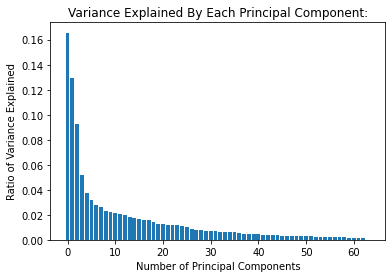

In [55]:
# Investigate the variance explained by each principal component.
plot.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plot.title('Variance Explained By Each Principal Component:')
plot.xlabel("Number of Principal Components")
plot.ylabel("Ratio of Variance Explained")

# Display the chart.
plot.show()

Show a chart of the cumulative variance explained:

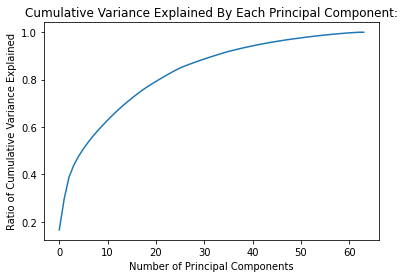

In [56]:
plot.plot(range(len(pca.explained_variance_ratio_)), np.cumsum(pca.explained_variance_ratio_), '-')
plot.title('Cumulative Variance Explained By Each Principal Component:')
plot.xlabel('Number of Principal Components')
plot.ylabel('Ratio of Cumulative Variance Explained')

# Display the chart.
plot.show()

As can be seen from the above chart, when the number of principal components is approximately 60, the ratio of cumulative variance explained is around 0.95. So, the value that I will retain for the clustering part of the project is 60.

Re-apply the PCA using the number of components to retain; in this case 60:

In [57]:
# Re-apply PCA to the data while selecting for the number of components to retain (in this case 60).
pca = PCA(n_components = 60)
azdias_clean_pca = pca.fit_transform(azdias_clean)

### Discussion 2.2: Perform Dimensionality Reduction

From the graph above, we see that using 60 as the number of components corresponds with approximately 95% cumulative variance explained.

### Step 2.3: Interpret Principal Components

Now that we have our transformed principal components, it's a nice idea to check out the weight of each variable on the first few components to see if they can be interpreted in some fashion.

As a reminder, each principal component is a unit vector that points in the direction of highest variance (after accounting for the variance captured by earlier principal components). The further a weight is from zero, the more the principal component is in the direction of the corresponding feature. If two features have large weights of the same sign (both positive or both negative), then increases in one tend expect to be associated with increases in the other. To contrast, features with different signs can be expected to show a negative correlation: increases in one variable should result in a decrease in the other.

- To investigate the features, you should map each weight to their corresponding feature name, then sort the features according to weight. The most interesting features for each principal component, then, will be those at the beginning and end of the sorted list. Use the data dictionary document to help you understand these most prominent features, their relationships, and what a positive or negative value on the principal component might indicate.
- You should investigate and interpret feature associations from the first three principal components in this substep. To help facilitate this, you should write a function that you can call at any time to print the sorted list of feature weights, for the *i*-th principal component. This might come in handy in the next step of the project, when you interpret the tendencies of the discovered clusters.

Define a function to determine PCA weights:

In [58]:
# HINT: Try defining a function here or in a new cell that you can reuse in the other cells.
def pca_weights(a_clean, pca, i):
    df = pd.DataFrame(pca.components_[i])
    df.index = a_clean.columns
    principal_component = 'Principal Component ' + str(i + 1)
    df.columns = [principal_component]
    weights = df.sort_values(by = [principal_component], ascending = False)
    return weights

Map weights for the first principal component and display those weights:

In [59]:
# Map weights for the first principal component to corresponding feature names
# and then print the linked values, sorted by weight.
feature_weights_pc1 = pca_weights(azdias_clean, pca, 0)
print(feature_weights_pc1)

                       Principal Component 1
PLZ8_ANTG3                          0.232915
PLZ8_ANTG4                          0.225885
WEALTH                              0.211125
ORTSGR_KLS9                         0.204096
EWDICHTE                            0.202342
HH_EINKOMMEN_SCORE                  0.179875
FINANZ_HAUSBAUER                    0.164822
PLZ8_ANTG2                          0.158660
KBA05_ANTG4                         0.157482
ARBEIT                              0.148030
ANZ_HAUSHALTE_AKTIV                 0.140799
RELAT_AB                            0.139886
KBA05_ANTG3                         0.137843
FINANZ_SPARER                       0.134274
MOVEMENT                            0.105987
SEMIO_PFLICHT                       0.105051
SEMIO_REL                           0.096772
DECADE                              0.089102
SEMIO_RAT                           0.086415
SEMIO_TRADV                         0.075254
REGIOTYP                            0.073626
SEMIO_MAT 

Map weights for the second principal component and display those weights:

In [60]:
# Map weights for the second principal component to corresponding feature names
# and then print the linked values, sorted by weight.
feature_weights_pc2 = pca_weights(azdias_clean, pca, 1)
print(feature_weights_pc2)

                       Principal Component 2
ALTERSKATEGORIE_GROB                0.270977
FINANZ_VORSORGER                    0.251018
SEMIO_ERL                           0.225109
SEMIO_LUST                          0.185637
RETOURTYP_BK_S                      0.172622
W_KEIT_KIND_HH                      0.125396
FINANZ_HAUSBAUER                    0.107974
FINANZ_MINIMALIST                   0.090046
EWDICHTE                            0.084480
PLZ8_ANTG3                          0.084230
ORTSGR_KLS9                         0.083100
PLZ8_ANTG4                          0.080515
WEALTH                              0.066647
WOHNDAUER_2008                      0.066517
HH_EINKOMMEN_SCORE                  0.064866
ARBEIT                              0.062924
KBA05_ANTG4                         0.062696
SEMIO_KAEM                          0.061869
SEMIO_KRIT                          0.061865
RELAT_AB                            0.060447
ANZ_HAUSHALTE_AKTIV                 0.058186
PLZ8_ANTG2

Map weights for the third principal component and display those weights:

In [61]:
# Map weights for the third principal component to corresponding feature names
# and then print the linked values, sorted by weight.
feature_weights_pc3 = pca_weights(azdias_clean, pca, 2)
print(feature_weights_pc3)

                       Principal Component 3
SEMIO_VERT                          0.353607
SEMIO_SOZ                           0.291003
SEMIO_KULT                          0.282852
SEMIO_FAM                           0.238198
FINANZ_MINIMALIST                   0.134382
RETOURTYP_BK_S                      0.080070
SEMIO_MAT                           0.068504
W_KEIT_KIND_HH                      0.066994
FINANZ_VORSORGER                    0.064333
SEMIO_REL                           0.059937
GREEN_AVANTGARDE                    0.057202
ALTERSKATEGORIE_GROB                0.040492
PLZ8_ANTG4                          0.034605
PLZ8_ANTG3                          0.033773
ORTSGR_KLS9                         0.033733
EWDICHTE                            0.032206
ARBEIT                              0.027182
HH_EINKOMMEN_SCORE                  0.026170
RELAT_AB                            0.023782
WEALTH                              0.022353
PLZ8_ANTG2                          0.021960
WOHNDAUER_

### Discussion 2.3: Interpret Principal Components

For each of the three principal components, I have listed the features with the top two positive correlations and the bottom two negative correlations. For each feature I have listed its description (as described in the data dictionary) and weight.

#### First principal component              

| Component: | Data Dictionary: | Weight: |
| :- | :- | :- |
|PLZ8_ANTG3|Number of 6-10 family houses in the PLZ8 region.|0.232915|
|PLZ8_ANTG4|Number of 10+ family houses in the PLZ8 region.|0.225885|

From the features that are positively correlated with the first principal component we see that the number of 6-10 family houses and 10+ houses increase when the first principal component increases.

| Component: | Data Dictionary: | Weight: |
| :- | :- | :- |
|PLZ8_ANTG1|Number of 1-2 family homes in the PLZ8 region.|-0.232261|
|MOBI_REGIO|Movement patterns.|-0.247236|

From the features that are negatively correlated with the first principal component we see that the number of 1-2 family homes and movement patterns decrease when the first principal component increases.

This principal component is about residential information and, to a lesser extent, movement patterns.

#### Second principal component

| Component: | Data Dictionary:| Weight: |
| :- | :- | :- |
|ALTERSKATEGORIE_GROB|Estimated age based on given name analysis.|0.270977|
|FINANZ_VORSORGER|Financial topology - be prepared.|0.251018|

From the features that are positively correlated with the second principal component we see that the estimated age based on a given name analysis and a be prepared financial view increase when the second principal component increases.

| Component: | Data Dictionary: | Weight: |
| :- | :- | :- |
|FINANZ_SPARER|Financial topology - money-saver.|-0.257439|
|DECADE|Generation by decade.|-0.264504|

From the features that are negatively correlated with the second principal component we see that a money-saver financial view and generation by decade decrease when the second principal component increases.

This principal component is about age and financial saving.

#### Third principal component

| Component: | Data Dictionary: | Weight: |
| :- | :- | :- |
|SEMIO_VERT|Personality topology - dreamful.|0.353607|
|SEMIO_SOZ|Personality topology - socially-minded.|0.291003|

From the features that are positively correlated with the third principal component we see that the dreamful personality type and socially-minded personality type increase when the third principal component increases.

| Component: | Data Dictionary: | Weight: |
| :- | :- | :- |
|SEMIO_KAEM|Personality topology - combative attitude.|-0.360295|
|ANREDE_KZ|Gender.|-0.362642|

From the features that are negatively correlated with the third principal component we see that a combative attitude personality type and gender decrease when the third principal component increases.

This principal component is about personality types and, to a lesser extent, gender.

**Note:** In general, all of the correlation values are considered, at best, weakly correlated to their respective principal component.

## Step 3: Clustering

### Step 3.1: Apply Clustering to General Population

You've assessed and cleaned the demographics data, then scaled and transformed them. Now, it's time to see how the data clusters in the principal components space. In this substep, you will apply k-means clustering to the dataset and use the average within-cluster distances from each point to their assigned cluster's centroid to decide on a number of clusters to keep.

- Use sklearn's [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) class to perform k-means clustering on the PCA-transformed data.
- Then, compute the average difference from each point to its assigned cluster's center. **Hint**: The KMeans object's `.score()` method might be useful here, but note that in sklearn, scores tend to be defined so that larger is better. Try applying it to a small, toy dataset, or use an internet search to help your understanding.
- Perform the above two steps for a number of different cluster counts. You can then see how the average distance decreases with an increasing number of clusters. However, each additional cluster provides a smaller net benefit. Use this fact to select a final number of clusters in which to group the data. **Warning**: because of the large size of the dataset, it can take a long time for the algorithm to resolve. The more clusters to fit, the longer the algorithm will take. You should test for cluster counts through at least 10 clusters to get the full picture, but you shouldn't need to test for a number of clusters above about 30.
- Once you've selected a final number of clusters to use, re-fit a KMeans instance to perform the clustering operation. Make sure that you also obtain the cluster assignments for the general demographics data, since you'll be using them in the final Step 3.3.

Define a function to calculate the KMeans:

In [62]:
# Function to provide KMeans.
def k_mean_score(data, cluster_count):
    kmeans = KMeans(n_clusters = cluster_count)
    model = kmeans.fit(data)
    score = np.abs(model.score(data))
    print(cluster_count, score)
    return score

Run k-means clustering over a number of different cluster counts - 1 to 10 inclusive (note that this took just over 7 minutes to run on my desktop PC - using the Udacity environment will mean it will take considerably longer):

In [63]:
# Over a number of different cluster counts...
    # run k-means clustering on the data and...    
    # compute the average within-cluster distances.
scores = []
clusters =list(range(1, 11))
for count in clusters:
    scores.append(k_mean_score(azdias_clean_pca, count))

1 50852119.01506464
2 44905589.279608555
3 41389263.2672632
4 39233415.690598674
5 37699287.18309455
6 36457115.586734034
7 35422925.186538026
8 34630840.294007115
9 33959118.77560963
10 33247615.25080023


Display a graph to visually obtain the cluster k value:

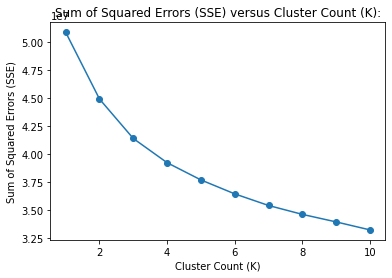

In [64]:
# Investigate the change in within-cluster distance across number of clusters.
# HINT: Use matplotlib's plot function to visualize this relationship.
plot.plot(clusters, scores, linestyle = '-', marker = 'o')
plot.xlabel('Cluster Count (K)')
plot.ylabel('Sum of Squared Errors (SSE)')
plot.title('Sum of Squared Errors (SSE) versus Cluster Count (K):')
plot.show()

From visual inspection it looks like a good value for K is 7, since after 7, the distance between cluster counts look uniform.

Re-fit the K-mean model with the chosen K value (number of clusters), which is 7.  Obtain the clusters prediction:

In [65]:
# Re-fit the K-means model with the selected number of clusters and obtain
# cluster predictions for the general population demographics data.
#
# NOTE: The random_state parameter uses a randomly chosen 4 digit number to
#       seed the KMeans function so that the prediction results will be consistent
#       from run to run.
kmeans = KMeans(n_clusters = 7, random_state = 5683)

In [66]:
# Calculate the model.
model_7 = kmeans.fit(azdias_clean_pca)

In [67]:
# Calculate the prediction values.
azdias_clusters_prediction = model_7.predict(azdias_clean_pca)

Display the newly obtained cluster prediction:

In [68]:
# Display the cluster prediction for the general population demographic data.
print(azdias_clusters_prediction)

[1 6 2 ... 5 6 2]


### Discussion 3.1: Apply Clustering to General Population

K = 7 looks (via a visual inspection) to be the point at which the distance between cluster counts looks uniform. So, 7 clusters will be used.

### Step 3.2: Apply All Steps to the Customer Data

Now that you have clusters and cluster centers for the general population, it's time to see how the customer data maps on to those clusters. Take care to not confuse this for re-fitting all of the models to the customer data. Instead, you're going to use the fits from the general population to clean, transform, and cluster the customer data. In the last step of the project, you will interpret how the general population fits apply to the customer data.

- Don't forget when loading in the customers data, that it is semicolon (`;`) delimited.
- Apply the same feature wrangling, selection, and engineering steps to the customer demographics using the `clean_data()` function you created earlier. (You can assume that the customer demographics data has similar meaning behind missing data patterns as the general demographics data.)
- Use the sklearn objects from the general demographics data, and apply their transformations to the customers data. That is, you should not be using a `.fit()` or `.fit_transform()` method to re-fit the old objects, nor should you be creating new sklearn objects! Carry the data through the feature scaling, PCA, and clustering steps, obtaining cluster assignments for all of the data in the customer demographics data.

Load in the customer demographics data.

In [69]:
# Load in the customer demographics data.
customers = pd.read_csv('Udacity_CUSTOMERS_Subset.csv', sep = ';')

Use the previously defined `clean_data` function to clean the customer data:

In [70]:
# Apply preprocessing, feature transformation, and clustering from the general
# demographics onto the customer data, obtaining cluster predictions for the
# customer demographics data.
customers_clean = clean_data(customers)

Start clean_data function:
dataset shape = (191652, 85)
features dataset shape = (85, 4)

Converted the missing data to NaNs.

Remove outliers:
['AGER_TYP', 'GEBURTSJAHR', 'TITEL_KZ', 'ALTER_HH', 'KK_KUNDENTYP', 'KBA05_BAUMAX']
Removed outliers.

Removed data with more than or equal to 25 missing data.

Remove multi-level features, and re-encode OST_WEST_KZ feature:
CJT_GESAMTTYP
FINANZTYP
GFK_URLAUBERTYP
LP_FAMILIE_FEIN
LP_FAMILIE_GROB
LP_STATUS_FEIN
LP_STATUS_GROB
NATIONALITAET_KZ
SHOPPER_TYP
ZABEOTYP
GEBAEUDETYP
CAMEO_DEUG_2015
CAMEO_DEU_2015
Removed multi-level features, and re-encoded OST_WEST_KZ feature with {'W': 0, 'O': 1} .

Added new columns derived from engineering columns.

Removed original engineered columns (rows for feature_data dataset).

Remove mixed features:
LP_LEBENSPHASE_FEIN
LP_LEBENSPHASE_GROB
WOHNLAGE
PLZ8_BAUMAX
Removed mixed features.

Removed any remaining NaNs.

dataset shape = (141701, 64)
feature dataset shape = (77, 4)
Finished clean_data function.


Apply the scaler transformation:

In [71]:
# Apply feature scaling to the customers data.
customers_clean = pd.DataFrame(scaler.transform(customers_clean), columns = customers_clean.columns)

Perform the PCA transformation:

In [72]:
# Apply PCA to the data while selecting for the number of components to retain (in this case 60).
customers_clean_pca = pca.transform(customers_clean)

Determine the customers clusters prediction:

In [73]:
# Predict using K-means model_7 derived previously.
customers_clusters_prediction = model_7.predict(customers_clean_pca)

Display the customers clusters prediction:

In [74]:
# Display the customers clusters prediction.
print(customers_clusters_prediction)

[3 3 0 ... 0 3 2]


### Step 3.3: Compare Customer Data to Demographics Data

At this point, you have clustered data based on demographics of the general population of Germany, and seen how the customer data for a mail-order sales company maps onto those demographic clusters. In this final substep, you will compare the two cluster distributions to see where the strongest customer base for the company is.

Consider the proportion of persons in each cluster for the general population, and the proportions for the customers. If we think the company's customer base to be universal, then the cluster assignment proportions should be fairly similar between the two. If there are only particular segments of the population that are interested in the company's products, then we should see a mismatch from one to the other. If there is a higher proportion of persons in a cluster for the customer data compared to the general population (e.g. 5% of persons are assigned to a cluster for the general population, but 15% of the customer data is closest to that cluster's centroid) then that suggests the people in that cluster to be a target audience for the company. On the other hand, the proportion of the data in a cluster being larger in the general population than the customer data (e.g. only 2% of customers closest to a population centroid that captures 6% of the data) suggests that group of persons to be outside of the target demographics.

Take a look at the following points in this step:

- Compute the proportion of data points in each cluster for the general population and the customer data. Visualizations will be useful here: both for the individual dataset proportions, but also to visualize the ratios in cluster representation between groups. Seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) or [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) function could be handy.
  - Recall the analysis you performed in step 1.1.3 of the project, where you separated out certain data points from the dataset if they had more than a specified threshold of missing values. If you found that this group was qualitatively different from the main bulk of the data, you should treat this as an additional data cluster in this analysis. Make sure that you account for the number of data points in this subset, for both the general population and customer datasets, when making your computations!
- Which cluster or clusters are overrepresented in the customer dataset compared to the general population? Select at least one such cluster and infer what kind of people might be represented by that cluster. Use the principal component interpretations from step 2.3 or look at additional components to help you make this inference. Alternatively, you can use the `.inverse_transform()` method of the PCA and StandardScaler objects to transform centroids back to the original data space and interpret the retrieved values directly.
- Perform a similar investigation for the underrepresented clusters. Which cluster or clusters are underrepresented in the customer dataset compared to the general population, and what kinds of people are typified by these clusters?

Create proportion data for the general population and customers data so that they can be compared:

In [75]:
# Calculate the proportion of data in each cluster for the customer data to the 
# proportion of data in each cluster for the general population.
azdias_proportion = []
customers_proportion = []
k = 7 # Number of clusters (previously determined).
azdias_prediction_length = len(azdias_clusters_prediction)
customers_prediction_length = len(customers_clusters_prediction)

clusters = [cluster for cluster in range(k)]

for cluster in range(k):
    azdias_proportion.append((azdias_clusters_prediction == cluster).sum() / azdias_prediction_length)
    customers_proportion.append((customers_clusters_prediction == cluster).sum() /customers_prediction_length)

Create a new dataset to hold the proportion data:

In [76]:
# Create a new dataset to hold the proportion data.
proportion_df = pd.DataFrame({'Customers Population': customers_proportion, 'General Population': azdias_proportion})

# Display the new dataset.
proportion_df.head(k)

,Customers Population,General Population
0,0.078779,0.123740
1,0.258848,0.209189
2,0.151806,0.159509
3,0.388854,0.165543
4,0.018948,0.100596
5,0.093598,0.122909
6,0.009167,0.118514


Calculate the proportion differences for each cluster and display that data:

In [77]:
# Calculate the difference between proportions for each cluster.
proportion_difference = proportion_df['Customers Population'] - proportion_df['General Population']

# Create a new dataset to hold the difference data.
proportion_difference_df = pd.DataFrame({'Difference': proportion_difference})

# Display the difference data.
proportion_difference_df.head(k)

,Difference
0,-0.044962
1,0.049659
2,-0.007703
3,0.223311
4,-0.081647
5,-0.029311
6,-0.109347


Positive values indicate overrepresented clusters and negative values indicate underrepresented clusters.  Based on the difference data, clusters 1 and 3 are overrepresented, whereas clusters 0, 2, 4, 5, and 6 are underrepresented.

Graph the proportion data so that the customer data and general population data can be easily compared:

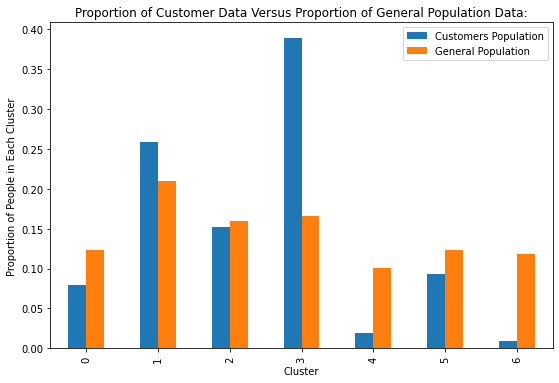

In [78]:
# Graph the proportion data.
proportion_df.plot(kind = 'bar', figsize = (9, 6))
plot.title('Proportion of Customer Data Versus Proportion of General Population Data:')
plot.xlabel('Cluster')
plot.ylabel('Proportion of People in Each Cluster')

# Display the chart.
plot.show()

From the graph it can be determined (by visual inspection) that cluster 3 is the most overrepresented cluster, and cluster 6 is the most underrepresented cluster.  This is also confirmed by looking at the previously generated difference data and noting the largest positive value (most overrepresented) and the smallest negative value (most underrepresented).

Determine the kinds of people that are overrepresented in the customer data compared to the general population using cluster 3:

In [79]:
# What kinds of people are part of a cluster that is overepresented in the
# customer data compared to the general population?
centroid_3 = scaler.inverse_transform(pca.inverse_transform(model_7.cluster_centers_[3]))
overrepresented_df = pd.Series(data = centroid_3, index = customers_clean.columns)

# Display items of the overrepresented data.
overrepresented_df

ALTERSKATEGORIE_GROB        3.430133
ANREDE_KZ                   1.002482
FINANZ_MINIMALIST           4.591851
FINANZ_SPARER               1.726930
FINANZ_VORSORGER            4.212032
FINANZ_ANLEGER              1.915580
FINANZ_UNAUFFAELLIGER       2.050437
FINANZ_HAUSBAUER            2.008050
GREEN_AVANTGARDE            0.368815
HEALTH_TYP                  2.175995
RETOURTYP_BK_S              3.839512
SEMIO_SOZ                   4.622728
SEMIO_FAM                   4.658601
SEMIO_REL                   3.734044
SEMIO_MAT                   3.586786
SEMIO_VERT                  6.022477
SEMIO_LUST                  4.959165
SEMIO_ERL                   4.167631
SEMIO_KULT                  4.949326
SEMIO_RAT                   2.797210
SEMIO_KRIT                  3.464418
SEMIO_DOM                   3.354617
SEMIO_KAEM                  2.714661
SEMIO_PFLICHT               3.192550
SEMIO_TRADV                 3.114560
SOHO_KZ                     0.009018
VERS_TYP                    1.549392
A

Determine the kinds of people that are underrepresented in the customer data compared to the general population using cluster 6:

In [80]:
# What kinds of people are part of a cluster that is underrepresented in the
# customer data compared to the general population?
centroid_6 = scaler.inverse_transform(pca.inverse_transform(model_7.cluster_centers_[6]))
underrepresented_df = pd.Series(data = centroid_6, index = customers_clean.columns)

# Display items of the underrepresented data.
underrepresented_df

ALTERSKATEGORIE_GROB        1.840355
ANREDE_KZ                   1.611599
FINANZ_MINIMALIST           1.379519
FINANZ_SPARER               4.377067
FINANZ_VORSORGER            2.079273
FINANZ_ANLEGER              3.911499
FINANZ_UNAUFFAELLIGER       3.681939
FINANZ_HAUSBAUER            4.085311
GREEN_AVANTGARDE            0.043723
HEALTH_TYP                  2.274679
RETOURTYP_BK_S              2.727814
SEMIO_SOZ                   4.564854
SEMIO_FAM                   5.105932
SEMIO_REL                   5.909284
SEMIO_MAT                   4.913640
SEMIO_VERT                  3.623474
SEMIO_LUST                  3.054743
SEMIO_ERL                   3.551041
SEMIO_KULT                  5.269627
SEMIO_RAT                   5.406556
SEMIO_KRIT                  4.497244
SEMIO_DOM                   4.921887
SEMIO_KAEM                  4.886891
SEMIO_PFLICHT               6.105091
SEMIO_TRADV                 5.280104
SOHO_KZ                     0.007732
VERS_TYP                    1.493552
A

### Discussion 3.3: Compare Customer Data to Demographics Data

**Observations:**

Clusters 1 and 3 are popular (overrepresented) with the mail-order company. Cluster 3 is the most overrepresented.

Clusters 0, 2, 4, 5, and 6 are unpopular (underrepresented) with the mail-order company. Cluster 6 is the most underepresented.

**Conclusions:**

Looking at the first eight features (with feature definitions from the data dictionary) for cluster 3 shows that the people in this cluster tend to be older (46 to 60 years old), male, very low to low in *low* financial interest, high to very high in money saving, very low to low in being prepared, high to very high in investing, average to high in inconspicuousness, and average to high in home ownership.

Looking at the first eight features (with data definitions from the data dictionary) for cluster 6 shows that the people in this cluster tend to be young (less than 30 years old), male, high to very high in *low* financial interest, very low to low in money saving, average to high in being prepared, low to average in investing, low to average in inconspicuousness, and very low to low in home ownership.

In summary, the data would infer that customers that are popular with the mail order company are older, inclined to make good financial decisions (in the present and the future), and likely own their own homes.  Customers that are unpopular with the mail order company are younger, financially less sophisticated (make less good financial decisions for the present and the future), and likely do not own their own home.